In [1]:
using Pkg
Pkg.add("DifferentialEquations")
Pkg.add("Plots")
using DifferentialEquations
using Plots

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


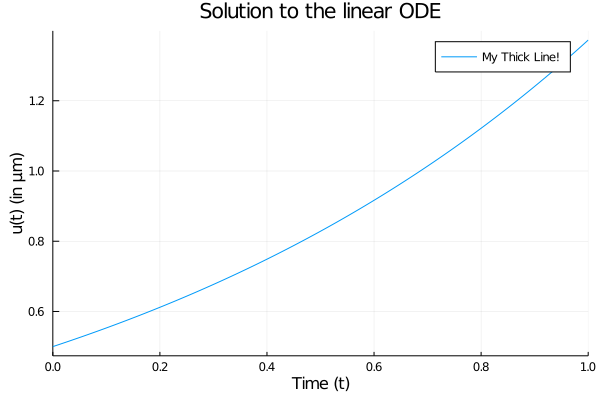

In [2]:
f(u,p,t) = 1.01*u
u0=1/2
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)
sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)
using Plots
plot(sol,linewidth=1,title="Solution to the linear ODE",
     xaxis="Time (t)",yaxis="u(t) (in μm)",label="My Thick Line!") # legend=false
#plot!(sol.t, t->0.5*exp(1.01t),lw=3,ls=:dash,label="True Solution!")

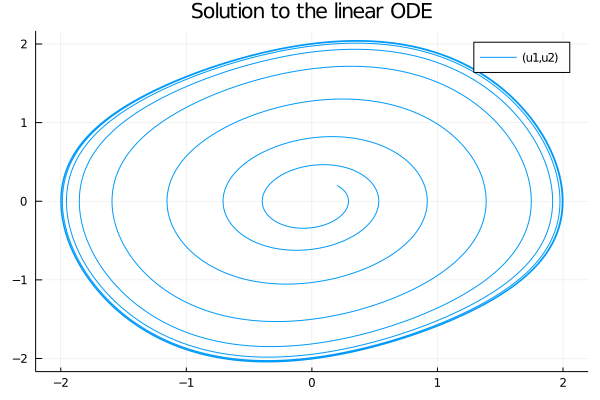

In [3]:
mu = 0.2
function vdp_sun(du, u, p, t)
    # dx/dt
    du[1] = u[2]
    # dy/dt
    du[2] = mu * (1.0 - u[1]^2.0) * u[2] - u[1]
    du
end
u0=[0.2; 0.2]
tspan=(0.0, 100.0)
prob = ODEProblem(vdp_sun,u0,tspan)
sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)
using Plots
plot(sol,vars=(1,2),linewidth=1,title="Solution to the linear ODE") # legend=false

In [4]:
# show algorithum
sol.alg

Tsit5()

In [6]:
# 問題のobject
sol.prob

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: 2-element Array{Float64,1}:
 0.2
 0.2

In [8]:
# 補間機能が利用できるかどうか
sol.dense

true

In [10]:
# 線形解法の回数や収束の失敗など，解法プロセスの内部統計
sol.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  6873
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          1145
Number of rejected steps:                          0

In [11]:
# the plot recipe behavior
sol.tslocation

0